<a href="https://colab.research.google.com/github/DAWUNHAN/deeplearning-fundamental/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [ ]:
from tensorflow.keras.datasets import cifar10

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

170508288/170498071 [==============================] - 6s 0us/step
train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [ ]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [ ]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### CIFAR10 데이터 시각화
* 이미지 크기는 32x32이며 RGB채널. 
* 전반적으로 Label에 해당하는 대상이 이미지의 중앙에 있고, Label 대상 오브젝트 위주로 이미지가 구성. 

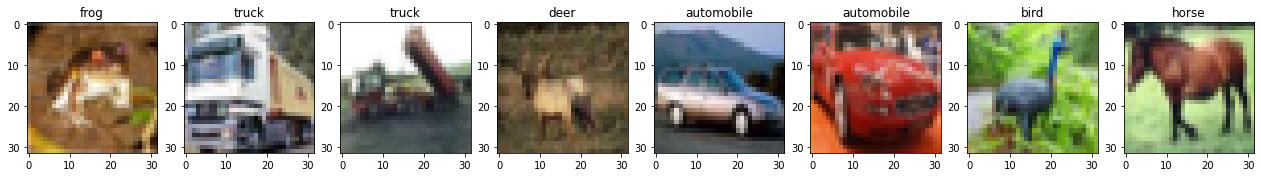

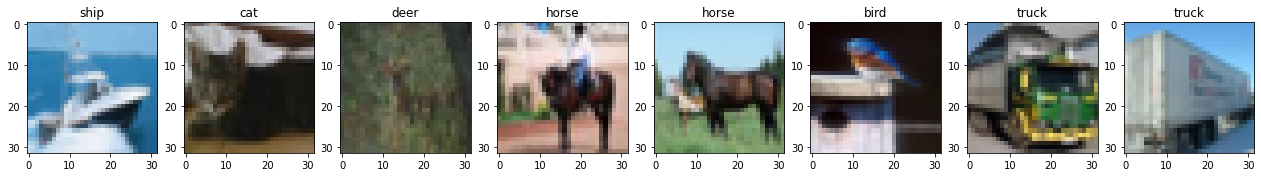

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### Data preprocessing
* image array의 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환. 정수값 pixel 값을 255.0 으로 나눔. 
* label array는 숫자형 값으로 바꾸되, 원-핫 인코딩을 적용할지 선택. 일반적으로 원-핫 인코딩을 적용하는게 Keras Framework활용이 용이
* image array, label array 모두 float32 형으로 변환. numpy 의 float32는 tensor 변환시 tf.float32 로 변환되며 기본적으로 Tensorflow backend Keras는 tf.float32를 기반으로 함. 


In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# label은 원-핫 인코딩이 Keras에서는 활용이 용이하나, 여기서는 sparse categorical crossentropy 테스트를 위해 적용하지 않음. 
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [ ]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
# Keras는 CNN(정확히는 CNN 2D) 모델에 학습 데이터를 입력할 시 반드시 Image array는 4차원 배열이 되어야 함. 
# RGB 채널 이미지 array는 기본적으로 3차원임. 여기에 이미지의 갯수를 포함하므로 4차원이 됨.  
# 만일 Grayscale인 2차원 이미지 array라도 의도적으로 채널을 명시해서 3차원으로 만들어 주고, 여기에 이미지 개수를 포함해서 4차원이 됨. 

print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
# label 데이터가 2차원임. 이를 Keras 모델에 입력해도 별 문제없이 동작하지만, label의 경우는 OHE적용이 안되었는지를 알 수 있게 명확하게 1차원으로 표현해 주는것이 좋음. 
# 2차원인 labels 데이터를 1차원으로 변경. 
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

### Custom Model 생성
* CNN Model의 맨처음 Layer는 Input layer. Input layer의 shape를 이미지 사이즈와 RGB 3채널에 맞게 (32, 32, 3) 으로 설정.
* Conv 연산을 연달아 적용하고 MaxPooling을 적용하는 루틴으로 모델 생성. MaxPooling을 적용 후에는 필터 갯수를 더욱 증가 시킴. 
* MaxPooling 적용 후에 출력 피처맵의 사이즈는 작아지되, 채널(깊이)는 늘어나는 형태로 모델 생성. 
* CIFAR10의 Label수가 10개이므로 Classification을 위한 맨 마지막 Dense layer의 units 갯수는 10개임
* label값이 원-핫 인코딩 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentropy여야함. 
* 만일 label값이 원-핫 인코딩 되었다면 loss는 categorical_crossentropy 임. 

In [ ]:
IMAGE_SIZE = 32

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

'''
param # = 2432인 이유 = 5*5*3*32 + 32(bias)    
'''

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                           

'\nparam # = 2432인 이유 = 5*5*3*32 + 32(bias)    \n'

In [ ]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이 아니므로 loss는 sparse_categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model 학습 수행 및 테스트 데이터로 평가 
* Model의 fit() 메소드를 호출하여 학습
* fit()은 학습 데이터가 Numpy array 자체로 들어올때, Generator 형태로 들어올때 약간의 수행로직 차이가 있음. 
* 인자로 x에는 학습 image data, y는 학습 label 데이터. 
* batch_size는 한번에 가져올 image/label array 갯수. 1개씩 가져오면 수행속도가 너무 느리고, 전체를 가져오면 GPU Memory 부족이 발생할 수 있으므로 적절한 batch_size 설정이 필요. 만약 학습 데이터가 generator일 경우, fit()에서 batch_size를 설정하지 않음. 
* epochs 는 전체 학습 데이터 학습을 반복 수행할 횟수
* steps_per_epoch는 전체 학습 데이터를 몇번 배치 작업으로 수행하는가를 의미. 보통 입력데이터가 generator일 경우 설정. 
* validation_data는 검증용 데이터 세트
* validation_steps는 검증용 데이터의 steps_per_epoch임. 
* validation_split는 validation_data로 별도의 검증용 데이터 세트를 설정하지 않고 자동으로 학습용 데이터에서 검증용 데이터 세트 분할. 


In [ ]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 6s 8ms/step - loss: 1.6262 - accuracy: 0.3984 - val_loss: 1.2329 - val_accuracy: 0.5557
Epoch 2/30
665/665 [==============================] - 5s 7ms/step - loss: 1.1677 - accuracy: 0.5841 - val_loss: 0.9786 - val_accuracy: 0.6540
Epoch 3/30
665/665 [==============================] - 4s 6ms/step - loss: 0.9806 - accuracy: 0.6537 - val_loss: 0.8399 - val_accuracy: 0.7033
Epoch 4/30
665/665 [==============================] - 5s 7ms/step - loss: 0.8585 - accuracy: 0.6996 - val_loss: 0.7634 - val_accuracy: 0.7333
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7664 - accuracy: 0.7308 - val_loss: 0.7295 - val_accuracy: 0.7420
Epoch 6/30
665/665 [==============================] - 5s 7ms/step - loss: 0.6964 - accuracy: 0.7560 - val_loss: 0.6980 - val_accuracy: 0.7560
Epoch 7/30
665/665 [==============================] - 4s 7ms/step - loss: 0.6419 - accuracy: 0.7756 - val_loss: 0.6519 - val_accuracy: 0.7760
Epoch 

313/313 [==============================] - 1s 3ms/step - loss: 0.7190 - accuracy: 0.7958


[0.7189682722091675, 0.795799970626831]

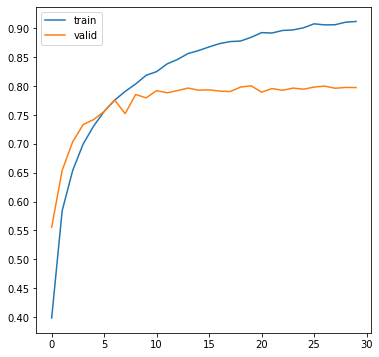

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

### model.predict()를 통해 이미지 분류 예측
* 4차원 이미지 배열을 입력해서 모델학습함. predict()시에도 4차원 이미지 배열을 입력해야함. 
* 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의  

In [ ]:
# 아래 코드는 오류 발생. Conv2D를 사용한 모델에 4차원 이미지 배열을 입력해서 모델을 학습했으므로 predict()시에도 테스트용 4차원 이미지 배열을 입력해야 함.  
preds = model.predict(test_images[0])

In [ ]:
# 테스트용 4차원 이미지 배열을 입력해서 predict()수행. 
# predict()의 결과는 softmax 적용 결과임. 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의 
preds = model.predict(np.expand_dims(test_images[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (1, 10)
예측 결과: [[3.1255343e-08 8.1436706e-12 9.3059853e-09 9.9861526e-01 2.0759312e-09
  1.3443424e-03 4.0315619e-05 6.4847159e-09 1.2585373e-09 2.8316980e-09]]


In [ ]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (32, 10)
예측 결과: [[3.12551052e-08 8.14351538e-12 9.30596755e-09 9.98615265e-01
  2.07590323e-09 1.34434563e-03 4.03157355e-05 6.48464127e-09
  1.25851085e-09 2.83164425e-09]
 [2.33903847e-05 8.07850342e-03 6.42520823e-15 1.85592730e-12
  1.99167194e-14 1.06156164e-16 1.38688262e-11 3.33159631e-17
  9.91895854e-01 2.19614890e-06]
 [3.60831642e-03 4.99136560e-03 1.43635965e-08 2.32472939e-05
  1.46687000e-08 3.57211911e-06 2.29770105e-08 6.56441102e-07
  9.91325259e-01 4.75366360e-05]
 [9.44688678e-01 1.50144988e-04 2.77663759e-07 1.46214541e-06
  4.57362412e-11 2.14076274e-11 3.55628416e-09 6.17707552e-11
  5.01898639e-02 4.96964948e-03]
 [2.97428166e-14 4.65330187e-14 1.41501482e-06 4.22116209e-05
  4.04114164e-02 2.24043437e-10 9.59544957e-01 7.20705818e-16
  1.21535350e-13 1.02398385e-11]
 [1.48864243e-09 1.52716346e-08 1.00547040e-05 1.72706583e-04
  2.36034775e-05 2.24436575e-04 9.99569118e-01 2.50767185e-09
  9.61021218e-09 2.90318116e-08]
 [2.58288765e-05 7.27577865e-

In [ ]:
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3 8 8 0 6 6 1 4 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5]


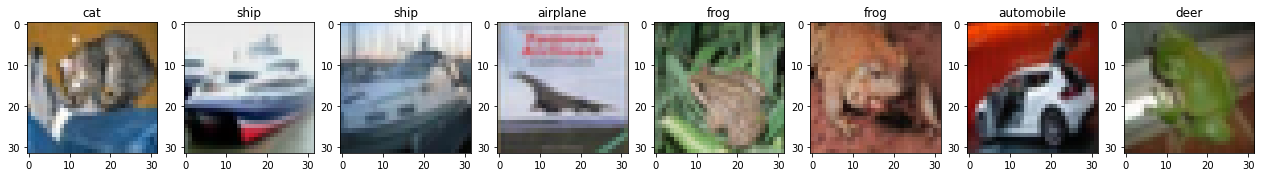

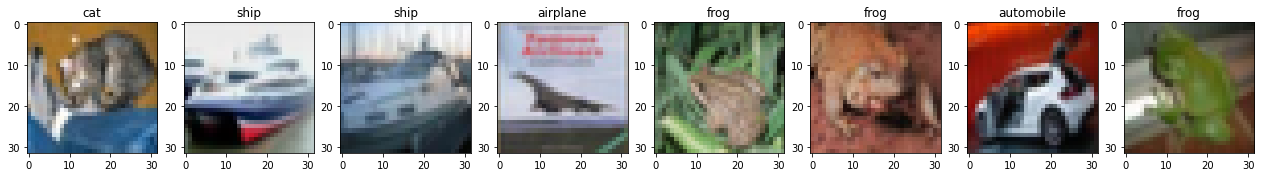

In [ ]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)
# 맨 마지막 개구리 사진은 잘못 예측함.

### 평균이 1 이고 표준편차가 1인 표준 정규분포에서 난수 추출
* 표준 편차가 클 수록 개별 값의 크기가 일반적으로 커짐.

In [ ]:
'''
np.random.normal은 정규 분포 난수 추출 함수. 
loc = 평균. scale 표준편차. 
'''
numbers = np.random.normal(loc=0.0,scale=1,size=[100, 100])
print(numbers)
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

[[-0.79134662  0.61081488 -0.93951528 ... -0.14186054 -0.67495374
  -0.41781558]
 [ 1.55376047 -0.39962337 -0.92417037 ... -1.6883084  -0.41622784
  -0.7659294 ]
 [-1.00009804 -1.62043562  0.47792401 ...  0.15193977 -0.68512999
  -1.05262194]
 ...
 [ 0.07137775  0.81989503  0.95100821 ...  1.88087506 -0.55485833
  -0.77246405]
 [-0.0129323  -0.48038217  0.21301149 ...  0.0581059   1.1072542
  -0.95404291]
 [-0.91368134 -0.86449293 -1.19574181 ... -0.86275192  1.03403738
   0.92169772]]
-0.0060060122378457976
0.993054072686864
-60.060122378457976


### Xavier initialization - 정규분포(glorot_normal), 균일분포(glorot_uniform) 

In [ ]:
# glorot_normal
fan_in = 20
fan_out = 15
scale_value = np.sqrt(2/(fan_in + fan_out))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.23904572186687872
[[-0.26834078 -0.19200976 -0.4625595  ... -0.17633404  0.1087722
  -0.13015605]
 [-0.0666797  -0.13674392 -0.24034975 ...  0.26562881 -0.09520079
  -0.42338598]
 [ 0.33774111 -0.54030651  0.58257019 ... -0.08741651 -0.07086151
   0.22712115]
 ...
 [-0.04911149 -0.08509569 -0.06283279 ... -0.09760333 -0.20288393
  -0.16079376]
 [-0.33081286 -0.18614516 -0.18007943 ... -0.01557452 -0.00539356
   0.18028554]
 [-0.21500192 -0.0655447  -0.11055094 ...  0.34918062 -0.17730887
  -0.234625  ]]
weights mean: -0.0034631343391761022 std: 0.23888550466122013 sum: -34.63134339176102


In [ ]:
# glorot_uniform
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in + fan_out))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.5773502691896257
[[ 0.5007488  -0.10312397 -0.12846807 ...  0.01245553 -0.43891502
   0.02595959]
 [-0.40092326  0.53055092  0.25281774 ... -0.38125813  0.04226378
   0.3994392 ]
 [ 0.42857926  0.55439939  0.08518123 ... -0.57404893 -0.42922306
   0.21231899]
 ...
 [-0.16558902  0.04836107  0.24582188 ...  0.10228813  0.4936429
   0.16365587]
 [-0.36342562  0.33405697  0.5108214  ...  0.32396477 -0.0935206
   0.26186983]
 [ 0.24234825  0.37535156  0.48943769 ...  0.20912006 -0.56936936
   0.3422474 ]]
weights mean: 0.0006304656900300863 std: 0.33448664030294684 sum: 6.304656900300863


### He initialization - 정규분포(he_normal), 균일분포(he_uniform) 

In [ ]:
fan_in = 10
fan_out = 8
scale_value = np.sqrt(2/(fan_in))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.4472135954999579
[[ 0.27928083  1.06853296  0.68812044 ...  0.00519863  0.37338649
   0.03111017]
 [-0.14099772 -0.24176124  0.03351721 ... -0.82221269 -0.16064244
   0.02617827]
 [ 0.01033604  0.58392456  0.75293029 ...  0.01854759  0.27169822
  -0.36184849]
 ...
 [ 0.27150067  0.77272358  0.60336294 ...  0.48542045 -0.16578508
  -0.20149342]
 [-0.76702209  0.3940018  -0.10473986 ... -0.83118823  0.18751527
  -0.04181324]
 [-0.22867626 -0.02262392  0.07937445 ...  0.36041227 -0.24813413
  -0.48821832]]
weights mean: 0.003673156686130439 std: 0.451475115136126 sum: 36.73156686130439


In [ ]:
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.7745966692414834
[[ 0.3042276  -0.27636178  0.38016506 ...  0.10054036  0.67222733
   0.48180121]
 [ 0.01891217 -0.57570656 -0.75387505 ...  0.69477696  0.25516763
  -0.04905514]
 [ 0.32137902  0.36003516 -0.16926827 ...  0.31582242 -0.74566096
   0.08241178]
 ...
 [-0.4457891  -0.09624984 -0.61091222 ...  0.07591229 -0.64667383
  -0.31843139]
 [ 0.08521069 -0.63917029  0.01038392 ... -0.00580054  0.3981015
  -0.2754741 ]
 [-0.5845088  -0.05387058 -0.37485089 ... -0.59562284 -0.46328221
   0.68166095]]
weights mean: -0.007080791021952641 std: 0.4495631021044442 sum: -70.8079102195264


### weight 초기화를 He Normal로 변경 후 성능 검증
* Keras Conv2D의 기본 weight 초기화는 glorot_uniform임. 이를 he_normal로 변경 후 동일 모델로 성능 테스트 
* label은 원-핫 인코딩을 적용 

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    labels = labels.squeeze()
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
print(train_images.shape, train_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                           

In [ ]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 8s 10ms/step - loss: 1.5850 - accuracy: 0.4153 - val_loss: 1.6192 - val_accuracy: 0.4476
Epoch 2/30
665/665 [==============================] - 5s 7ms/step - loss: 1.1511 - accuracy: 0.5904 - val_loss: 0.9867 - val_accuracy: 0.6572
Epoch 3/30
665/665 [==============================] - 5s 8ms/step - loss: 0.9680 - accuracy: 0.6588 - val_loss: 0.9220 - val_accuracy: 0.6783
Epoch 4/30
665/665 [==============================] - 6s 8ms/step - loss: 0.8424 - accuracy: 0.7027 - val_loss: 0.8370 - val_accuracy: 0.7115
Epoch 5/30
665/665 [==============================] - 5s 7ms/step - loss: 0.7511 - accuracy: 0.7343 - val_loss: 0.7396 - val_accuracy: 0.7447
Epoch 6/30
665/665 [==============================] - 5s 7ms/step - loss: 0.6850 - accuracy: 0.7584 - val_loss: 0.7796 - val_accuracy: 0.7317
Epoch 7/30
665/665 [==============================] - 4s 7ms/step - loss: 0.6277 - accuracy: 0.7783 - val_loss: 0.7704 - val_accuracy: 0.7369
Epoch

313/313 [==============================] - 1s 3ms/step - loss: 0.7857 - accuracy: 0.7779


[0.7857272624969482, 0.777899980545044]

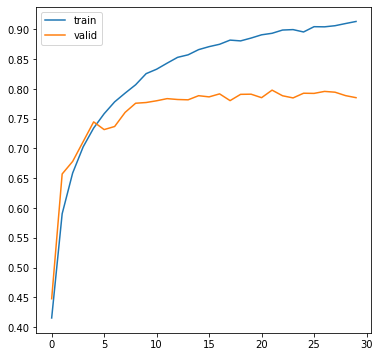

In [ ]:
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_oh_labels)

### Batch Normalization을 모델에 적용 후 성능 검증
- Batch Normalization 하기 전에 `kernel_initializer='he_normal'`하면 성능에 큰 차이가 없다.

In [ ]:
import tensorflow as tf
import numpy as np
import random as python_random

np.random.seed(2021)
python_random.seed(2021)
tf.random.set_seed(2021)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
# BatchNormalization 이후에 activation을 해야한다! 그러므로 BatchNormalization할 때는
# x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor) 이렇게 쓰면 안된다. 

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [ ]:
# label값이 원-핫 인코딩이 아니므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 8s 10ms/step - loss: 1.5712 - accuracy: 0.4303 - val_loss: 1.3633 - val_accuracy: 0.5229
Epoch 2/30
665/665 [==============================] - 6s 9ms/step - loss: 1.1060 - accuracy: 0.6009 - val_loss: 1.5711 - val_accuracy: 0.5133
Epoch 3/30
665/665 [==============================] - 7s 10ms/step - loss: 0.9123 - accuracy: 0.6822 - val_loss: 1.1449 - val_accuracy: 0.6228
Epoch 4/30
665/665 [==============================] - 6s 8ms/step - loss: 0.8004 - accuracy: 0.7228 - val_loss: 0.8534 - val_accuracy: 0.7036
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7161 - accuracy: 0.7494 - val_loss: 0.9655 - val_accuracy: 0.6780
Epoch 6/30
665/665 [==============================] - 6s 8ms/step - loss: 0.6527 - accuracy: 0.7743 - val_loss: 0.8448 - val_accuracy: 0.7291
Epoch 7/30
665/665 [==============================] - 5s 8ms/step - loss: 0.5944 - accuracy: 0.7935 - val_loss: 0.9974 - val_accuracy: 0.6713
Epoc

In [ ]:
model.evaluate(test_images, test_oh_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.7446 - accuracy: 0.8176


[0.7446005344390869, 0.8176000118255615]

### 학습 시 데이터를 섞는 shuffle 적용 유무에 따른  성능 테스트

In [1]:
import tensorflow as tf
import numpy as np
import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# seed 를 설정해서 학습시마다 동일한 결과 유도. 불행히도 의도한 대로 동작하지 않음. 
def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 

In [2]:
from tensorflow.keras.datasets import cifar10

# random seed는 2021로 고정.
set_random_seed(2021)
# CIFAR10 데이터 재 로딩 및 Scaling/OHE 전처리 적용하여 학습/검증/데이터 세트 생성. 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


### model 생성을 위한 별도 함수 생성

In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

IMAGE_SIZE = 32

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    #x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    # cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
    x = Flatten(name='flatten')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    #model.summary()
    
    return model


### shuffle을 False/True 변경하면서 테스트 

In [6]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# 먼저 shuffle을 false로 테스트 
noshuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=30, shuffle=False, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=64)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

# model이 반복적으로 메모리 차지하는것을 없애기 위해서 수행. 
tf.keras.backend.clear_session()

Epoch 1/30
665/665 [==============================] - 17s 10ms/step - loss: 1.5766 - accuracy: 0.4263 - val_loss: 1.4160 - val_accuracy: 0.4989
Epoch 2/30
665/665 [==============================] - 6s 9ms/step - loss: 1.1245 - accuracy: 0.5993 - val_loss: 1.1802 - val_accuracy: 0.5896
Epoch 3/30
665/665 [==============================] - 6s 10ms/step - loss: 0.9249 - accuracy: 0.6734 - val_loss: 0.9574 - val_accuracy: 0.6575
Epoch 4/30
665/665 [==============================] - 6s 10ms/step - loss: 0.8141 - accuracy: 0.7158 - val_loss: 0.9491 - val_accuracy: 0.6765
Epoch 5/30
665/665 [==============================] - 6s 9ms/step - loss: 0.7249 - accuracy: 0.7489 - val_loss: 0.8124 - val_accuracy: 0.7231
Epoch 6/30
665/665 [==============================] - 6s 10ms/step - loss: 0.6476 - accuracy: 0.7728 - val_loss: 1.1241 - val_accuracy: 0.6691
Epoch 7/30
665/665 [==============================] - 6s 10ms/step - loss: 0.5880 - accuracy: 0.7964 - val_loss: 0.9309 - val_accuracy: 0.7131


### shuffle을 True로 변경하고 학습 및 테스트

In [7]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# shuffle을 True로 변경하여 학습 및 테스트
shuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=30, shuffle=True, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=64)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

tf.keras.backend.clear_session()

Epoch 1/30
665/665 [==============================] - 9s 11ms/step - loss: 1.5574 - accuracy: 0.4364 - val_loss: 1.2938 - val_accuracy: 0.5404
Epoch 2/30
665/665 [==============================] - 6s 10ms/step - loss: 1.1032 - accuracy: 0.6052 - val_loss: 1.4110 - val_accuracy: 0.5343
Epoch 3/30
665/665 [==============================] - 7s 10ms/step - loss: 0.9199 - accuracy: 0.6762 - val_loss: 0.8634 - val_accuracy: 0.6992
Epoch 4/30
665/665 [==============================] - 7s 10ms/step - loss: 0.8023 - accuracy: 0.7224 - val_loss: 0.8768 - val_accuracy: 0.6864
Epoch 5/30
665/665 [==============================] - 6s 9ms/step - loss: 0.7175 - accuracy: 0.7513 - val_loss: 0.7562 - val_accuracy: 0.7371
Epoch 6/30
665/665 [==============================] - 6s 10ms/step - loss: 0.6471 - accuracy: 0.7744 - val_loss: 0.7890 - val_accuracy: 0.7297
Epoch 7/30
665/665 [==============================] - 6s 9ms/step - loss: 0.5896 - accuracy: 0.7944 - val_loss: 0.7390 - val_accuracy: 0.7485
E

### 위에서 수행한 Shuffle테스트 시 validation 데이터 기반 성능 검증 시각화 

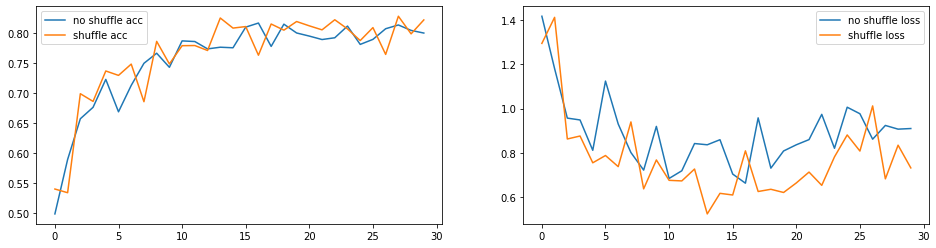

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_shuffle(noshuffle_history, shuffle_history):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    # shuffle과 no shuffle의 validation accuracy 비교 
    axs[0].plot(noshuffle_history.history['val_accuracy'], label='no shuffle acc')
    axs[0].plot(shuffle_history.history['val_accuracy'], label='shuffle acc')
    # shuffle과 no shuffle의 validation loss 비교 
    axs[1].plot(noshuffle_history.history['val_loss'], label='no shuffle loss')
    axs[1].plot(shuffle_history.history['val_loss'], label='shuffle loss')
    axs[0].legend()
    axs[1].legend()

show_history_shuffle(noshuffle_history, shuffle_history)


### batch 크기를 32, 64, 256, 512로 변경하면서 테스트
- 큰 배치를 적용하면 더 많은 데이터를 SGD를 위해 sampling하므로 더 나은 가중치 update가 될 것으로 생각되었으나 테스트 결과는 다름. 
- 큰 batch size를 적용하는 것보다 작은 batch size를 적용하는 것이 성능이 더 좋다. 
- 큰 batch size보다는 작은 batch size가 상대적으로 더 자주 SGD를 계산하고 weight를 update하므로 보다 정확한 최적화가 가능하다. 
- 논문에서는 8보다는 크고, 32 보다는 작을 것을 권고. 

In [9]:
b_sizes = [32, 64, 256, 512]
histories = []
evaluations = []
for b_size in b_sizes:
    model = create_model()
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    # batch_size를 순차적으로 32, 64, 256, 512로 변경하여 학습 및 evaluation 수행. 
    print('##### batch size :', b_size, '학습 #####')
    history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=b_size, epochs=30, 
                        shuffle=True, validation_data=(val_images, val_oh_labels))
    # batch size별 학습 history 결과 저장. 
    histories.append(history)
    # 테스트 세트로 evaluation 수행하고 batch size별 결과 저장. 
    evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=b_size)
    print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)
    evaluations.append(evaluation_result)
    
    tf.keras.backend.clear_session()

##### batch size : 32 학습 #####
Epoch 1/30
1329/1329 [==============================] - 11s 7ms/step - loss: 1.5693 - accuracy: 0.4345 - val_loss: 1.3944 - val_accuracy: 0.5171
Epoch 2/30
1329/1329 [==============================] - 10s 7ms/step - loss: 1.1148 - accuracy: 0.6036 - val_loss: 0.9968 - val_accuracy: 0.6356
Epoch 3/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.9252 - accuracy: 0.6768 - val_loss: 0.8117 - val_accuracy: 0.7196
Epoch 4/30
1329/1329 [==============================] - 9s 7ms/step - loss: 0.8154 - accuracy: 0.7180 - val_loss: 0.8411 - val_accuracy: 0.7060
Epoch 5/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.7239 - accuracy: 0.7499 - val_loss: 0.9243 - val_accuracy: 0.6879
Epoch 6/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.6546 - accuracy: 0.7766 - val_loss: 0.8167 - val_accuracy: 0.7365
Epoch 7/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.5908 - accuracy: 0.79

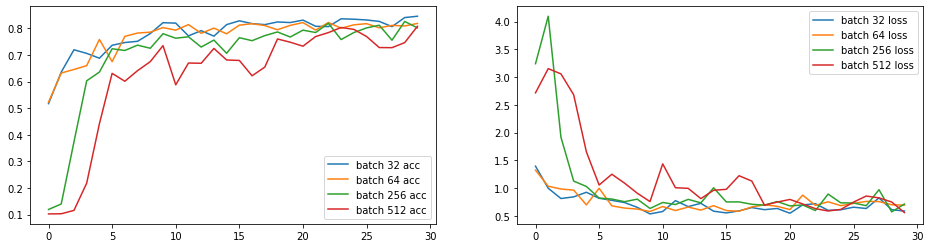

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_batch(histories):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))  
    # batch 크기별 validation accuracy 비교 
    axs[0].plot(histories[0].history['val_accuracy'], label='batch 32 acc')
    axs[0].plot(histories[1].history['val_accuracy'], label='batch 64 acc')
    axs[0].plot(histories[2].history['val_accuracy'], label='batch 256 acc')
    axs[0].plot(histories[3].history['val_accuracy'], label='batch 512 acc')
    
    # batch 크기별 validation loss 비교
    axs[1].plot(histories[0].history['val_loss'], label='batch 32 loss')
    axs[1].plot(histories[1].history['val_loss'], label='batch 64 loss')
    axs[1].plot(histories[2].history['val_loss'], label='batch 256 loss')
    axs[1].plot(histories[3].history['val_loss'], label='batch 512 loss')
    
    axs[0].legend()
    axs[1].legend()

show_history_batch(histories)

# 학습률 동적 변경에 따른 모델 성능 비교

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd

import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

# seed 를 설정해서 학습시마다 동일한 결과 유도. 불행히도 의도한 대로 동작하지 않음. 
def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 


# random seed는 2021로 고정.
set_random_seed(2021)
# CIFAR10 데이터 재 로딩 및 Scaling/OHE 전처리 적용하여 학습/검증/데이터 세트 생성. 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


In [12]:
IMAGE_SIZE = 32

### 모델 생성 함수 생성

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_model(verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    #x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    # cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
    x = Flatten(name='flatten')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [14]:
create_model(verbose=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                             

### Learning Rate와 Early Stopping을 위한 Callback 생성 
* Learning rate 동적 변경은 ReduceLROnPlateau,  모델 Ealry Stopping은 EarlyStopping Callback을 이용.  

In [15]:
# ModelCheckpoint를 동작시키기 전에 기존 저장된 모델은 모두 삭제 
!rm *.hdf5

rm: cannot remove '*.hdf5': No such file or directory


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# validation loss가 향상되는 모델만 저장.
mcp_cb = ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/deeplearning-fundamental/models/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)


history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=30, shuffle=True,
                    validation_data=(val_images, val_oh_labels),  
                    callbacks=[mcp_cb, rlr_cb, ely_cb] )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
1329/1329 [==============================] - 17s 11ms/step - loss: 1.5740 - accuracy: 0.4343 - val_loss: 1.2513 - val_accuracy: 0.5595 - lr: 0.0010
Epoch 2/30
1329/1329 [==============================] - 9s 7ms/step - loss: 1.1049 - accuracy: 0.6076 - val_loss: 0.9581 - val_accuracy: 0.6608 - lr: 0.0010
Epoch 3/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.9249 - accuracy: 0.6768 - val_loss: 0.9282 - val_accuracy: 0.6759 - lr: 0.0010
Epoch 4/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.8088 - accuracy: 0.7197 - val_loss: 0.8989 - val_accuracy: 0.6987 - lr: 0.0010
Epoch 5/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.7206 - accuracy: 0.7509 - val_loss: 0.8248 - val_accuracy: 0.7156 - lr: 0.0010
Epoch 6/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.6551 - accuracy: 0.7762 - val_loss: 0.6975 - val_accuracy: 0.7688 - lr: 0.0010
Epoch 7/30
1329/1329 [==============================

In [19]:
model.evaluate(test_images, test_oh_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.6027 - accuracy: 0.8504


[0.602685809135437, 0.8503999710083008]

In [20]:
!ls -lia

total 20
3146567 drwxr-xr-x 1 root root 4096 Jan  4 12:18 .
4341927 drwxr-xr-x 1 root root 4096 Jan  4 11:32 ..
4063282 drwxr-xr-x 4 root root 4096 Dec  3 14:33 .config
      1 drwx------ 5 root root 4096 Jan  4 12:18 drive
3146568 drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data


### 최적 weight를 모델로 재 로딩한 다음에 테스트 데이터로 다시 평가

In [22]:
model = create_model()
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights('/content/drive/MyDrive/Colab Notebooks/deeplearning-fundamental/models/weights.15-0.49.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
model.evaluate(test_images, test_oh_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.5120 - accuracy: 0.8476


[0.5119877457618713, 0.847599983215332]

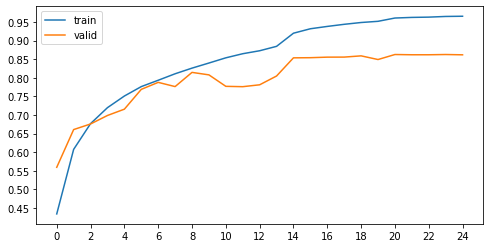

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(8, 4))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.xticks(np.arange(0, 30, 2))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

### 필터의 개수를 증가시켜 테스트
* Conv Layer의 필터를 기존보다 2배씩 증가
* 맨 마지막 Conv는 512로 대폭 증가

In [25]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# 512 filters Conv layer 추가
x = Conv2D(filters=512, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_35 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_26 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                          

In [26]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)


history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=30, shuffle=True,
                    validation_data=(val_images, val_oh_labels),  
                    callbacks=[rlr_cb, ely_cb] )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
1329/1329 [==============================] - 20s 14ms/step - loss: 1.8645 - accuracy: 0.3107 - val_loss: 1.5231 - val_accuracy: 0.4295 - lr: 0.0010
Epoch 2/30
1329/1329 [==============================] - 18s 14ms/step - loss: 1.4528 - accuracy: 0.4485 - val_loss: 1.4836 - val_accuracy: 0.5024 - lr: 0.0010
Epoch 3/30
1329/1329 [==============================] - 18s 14ms/step - loss: 1.1999 - accuracy: 0.5628 - val_loss: 1.0846 - val_accuracy: 0.5905 - lr: 0.0010
Epoch 4/30
1329/1329 [==============================] - 18s 14ms/step - loss: 1.0419 - accuracy: 0.6295 - val_loss: 0.8896 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 5/30
1329/1329 [==============================] - 18s 14ms/step - loss: 0.9265 - accuracy: 0.6712 - val_loss: 0.8831 - val_accuracy: 0.7079 - lr: 0.0010
Epoch 6/30
1329/1329 [==============================] - 18s 14ms/step - loss: 0.8193 - accuracy: 0.7163 - val_loss: 0.8718 - val_accuracy: 0.7248 - lr: 0.0010
Epoch 7/30
1329/1329 [========================

313/313 [==============================] - 2s 6ms/step - loss: 1.0018 - accuracy: 0.8625


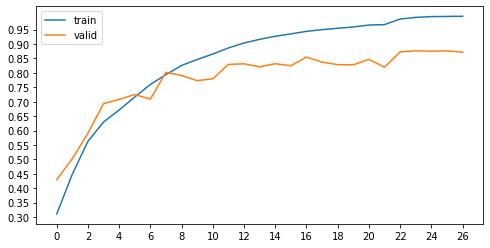

In [27]:
model.evaluate(test_images, test_oh_labels)
show_history(history)

### 맨 마지막 Conv + MaxPooling 대신 맨 마지막 Conv의 Strides를 2로 하여 Feature map 조정

In [28]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# 512 filters Conv layer 추가하되 이후 MaxPooling을 적용하지 않고 strides는 2로 변경하여 출력 feature map 크기 조정
x = Conv2D(filters=512, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_31 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_43 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_32 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                          

In [29]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)


history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=30, shuffle=True,
                    validation_data=(val_images, val_oh_labels),  
                    callbacks=[rlr_cb, ely_cb] )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
1329/1329 [==============================] - 21s 15ms/step - loss: 1.5708 - accuracy: 0.4318 - val_loss: 1.2104 - val_accuracy: 0.5679 - lr: 0.0010
Epoch 2/30
1329/1329 [==============================] - 20s 15ms/step - loss: 1.1270 - accuracy: 0.6003 - val_loss: 1.5806 - val_accuracy: 0.5308 - lr: 0.0010
Epoch 3/30
1329/1329 [==============================] - 20s 15ms/step - loss: 0.9395 - accuracy: 0.6724 - val_loss: 1.1589 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 4/30
1329/1329 [==============================] - 20s 15ms/step - loss: 0.8208 - accuracy: 0.7197 - val_loss: 0.7396 - val_accuracy: 0.7475 - lr: 0.0010
Epoch 5/30
1329/1329 [==============================] - 20s 15ms/step - loss: 0.7000 - accuracy: 0.7642 - val_loss: 0.7785 - val_accuracy: 0.7452 - lr: 0.0010
Epoch 6/30
1329/1329 [==============================] - 20s 15ms/step - loss: 0.6100 - accuracy: 0.7958 - val_loss: 0.6539 - val_accuracy: 0.7823 - lr: 0.0010
Epoch 7/30
1329/1329 [========================

313/313 [==============================] - 2s 6ms/step - loss: 0.8609 - accuracy: 0.8654


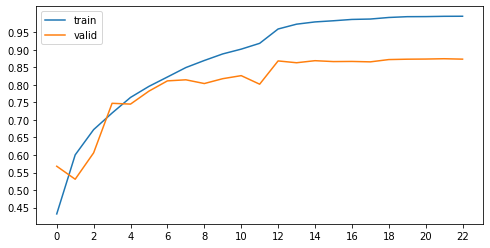

In [30]:
model.evaluate(test_images, test_oh_labels)
show_history(history)

### Global Average Pooling의 적용
* Global Average Pooling은 피처맵의 가로x세로의 특정 영역을 Sub sampling 않고, 채널별로 평균 값을 추출
* 충분히 Feature map의 채널수가 많을 경우 이를 적용. 채널수가 적다면 Flatten이 유리. 
* Flatten-> Classification Dense Layer로 이어지면서 많은 파라미터들로 인한 오버피팅 유발 가능성 증대 및 학습 시간 늘어남. 
* 맨 마지막 Feature Map의 채널 수가 충분히 크다면 GlobalAveragePooling2D를 적용하여 Flatten을 제거하는데 더 유리 할 수 있음. 

In [31]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Flatten 대신 Global AveragePooling 을 적용. 
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(50, activation='relu', name='fc1')(x)
x = Dropout(rate=0.2)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_37 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_51 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_38 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                          

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)


history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=30, shuffle=True,
                    validation_data=(val_images, val_oh_labels),  
                    callbacks=[rlr_cb, ely_cb] )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
1329/1329 [==============================] - 48s 36ms/step - loss: 1.4964 - accuracy: 0.4533 - val_loss: 1.7020 - val_accuracy: 0.4639 - lr: 0.0010
Epoch 2/30
1329/1329 [==============================] - 20s 15ms/step - loss: 1.0114 - accuracy: 0.6440 - val_loss: 1.0881 - val_accuracy: 0.6045 - lr: 0.0010
Epoch 3/30
1329/1329 [==============================] - 20s 15ms/step - loss: 0.8149 - accuracy: 0.7194 - val_loss: 0.8670 - val_accuracy: 0.7033 - lr: 0.0010
Epoch 4/30
1329/1329 [==============================] - 20s 15ms/step - loss: 0.6844 - accuracy: 0.7692 - val_loss: 0.7549 - val_accuracy: 0.7496 - lr: 0.0010
Epoch 5/30
1329/1329 [==============================] - 20s 15ms/step - loss: 0.5781 - accuracy: 0.8047 - val_loss: 0.6386 - val_accuracy: 0.7801 - lr: 0.0010
Epoch 6/30
1329/1329 [==============================] - 20s 15ms/step - loss: 0.4896 - accuracy: 0.8371 - val_loss: 0.7591 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 7/30
1329/1329 [========================

313/313 [==============================] - 2s 5ms/step - loss: 0.7852 - accuracy: 0.8574


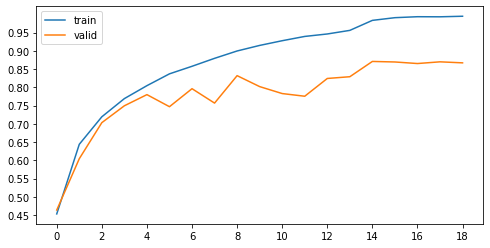

In [33]:
model.evaluate(test_images, test_oh_labels)
show_history(history)

### 가중치 규제(Weight Regularizations)
* 개별 layer별로 tensorflow.keras.regularizers의 l1, l2, l1_l2 를 이용하여 가중치 규제를 적용할 수 있음. 

In [34]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.regularizers import l1, l2, l1_l2

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.00001))(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.00001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5))(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# 512 filters Conv layer 추가하되 이후 MaxPooling을 적용하지 않고 strides는 2로 변경하여 출력 feature map 크기 조정
x = Conv2D(filters=512, kernel_size=3, strides=2, padding='same', kernel_regularizer=l2(1e-5))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', kernel_regularizer=l2(1e-5), name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_43 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_59 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_44 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                          

In [35]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)


history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=30, shuffle=True,
                    validation_data=(val_images, val_oh_labels),  
                    callbacks=[rlr_cb, ely_cb] )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
1329/1329 [==============================] - 24s 17ms/step - loss: 1.6869 - accuracy: 0.3964 - val_loss: 1.5643 - val_accuracy: 0.4651 - lr: 0.0010
Epoch 2/30
1329/1329 [==============================] - 21s 16ms/step - loss: 1.2521 - accuracy: 0.5737 - val_loss: 1.4027 - val_accuracy: 0.5445 - lr: 0.0010
Epoch 3/30
1329/1329 [==============================] - 21s 16ms/step - loss: 1.0597 - accuracy: 0.6568 - val_loss: 0.9625 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 4/30
1329/1329 [==============================] - 21s 16ms/step - loss: 0.9532 - accuracy: 0.7067 - val_loss: 1.1303 - val_accuracy: 0.6757 - lr: 0.0010
Epoch 5/30
1329/1329 [==============================] - 22s 16ms/step - loss: 0.8732 - accuracy: 0.7431 - val_loss: 0.8653 - val_accuracy: 0.7473 - lr: 0.0010
Epoch 6/30
1329/1329 [==============================] - 22s 16ms/step - loss: 0.7951 - accuracy: 0.7797 - val_loss: 0.8556 - val_accuracy: 0.7681 - lr: 0.0010
Epoch 7/30
1329/1329 [========================

313/313 [==============================] - 2s 6ms/step - loss: 0.9300 - accuracy: 0.8693


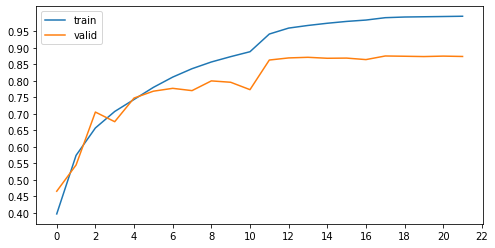

In [36]:
model.evaluate(test_images, test_oh_labels)
show_history(history)